In [5]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import pdb
from scipy import integrate
from scipy import special
import numpy as np
from cmath import *
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from patch_geo_func import x_ep, y_ep
from sys import stdout
import warnings
np.seterr(invalid = 'raise', under = 'ignore', over = 'ignore')
from LGN_surface import *
from repel_system import *

In [7]:
posL_file = 'parvo_pos_I5_uniform.bin'
posR_file = 'parvo_pos_C6_uniform.bin'
shape_file = 'LGN_shape.bin'
ecc = 2.51 #in deg

nx = 101
ny = 201

x = np.linspace(0, ecc, nx)
dx = x[1]-x[0]
x = np.linspace(-dx, ecc+dx, nx)

y = np.linspace(-ecc, ecc, ny)
dy = y[1]-y[0]
y = np.linspace(-ecc-dy, ecc+dy, ny)

xx, yy = np.meshgrid(x,y)
Pi = np.sqrt(xx*xx + yy*yy) - ecc < 0
Pi[xx<0] = 0
print(Pi.shape)
with open(shape_file, 'wb') as f:
    np.array([nx, ny], dtype = 'u4').tofile(f)
    x.tofile(f)
    y.tofile(f)
    Pi.astype('i4').tofile(f)
print([np.min(x), np.max(x)])
print([np.min(y), np.max(y)])

(201, 101)
[-0.025099999999999997, 2.5351]
[-2.5351, 2.5351]


In [4]:
#pos_file = 'temp_pos11.bin'
pos_file = posL_file
LGN_surfaceL = surface(shape_file, pos_file, 2.525)
LGN_surfaceL.prep_pos()
LGN_surfaceL.save(parallel_file = 'parallel_lgnL.bin')

In [8]:
pos_file = posR_file
LGN_surfaceR = surface(shape_file, pos_file, 2.525)
LGN_surfaceR.prep_pos()
LGN_surfaceR.save(parallel_file = 'parallel_lgnR.bin')

get the index of the nearest vertex for each neuron in its own grid
calculate neurons' cortical distance to the nearest vertex in the grid
#boundary points: 960 
adjust 960 positions near the boundary
get the index of the nearest vertex for each neuron in its own grid
calculate neurons' cortical distance to the nearest vertex in the grid
after pos adjustment: 
defining the boundary midway through the grid


In [ ]:
fig = plt.figure('vf_pos', dpi = 900)
ax = fig.add_subplot(111)
LGN_surfaceR.plot_surface(ax)

In [ ]:
fig = plt.figure('vf_pos', dpi = 900)
ax = fig.add_subplot(111)
dt0 = np.power(2.0,-np.arange(7,8)).reshape(1,1)
dt1 = np.power(2.0,-np.arange(7,8)).reshape(1,1)
dt = np.hstack((np.tile(dt0,(25,1)).flatten(), np.tile(dt1,(5,1)).flatten()))
LGN_surfaceL.make_pos_uniform(dt, ax = ax, b_scale = 1.0, p_scale = 2.5)

In [ ]:
LGN_surfaceL.save_pos('temp_pos.bin')

In [ ]:
pfile = 'parvo_pos_I5_cart.bin'
with open(pfile, 'rb') as f:
    n = np.fromfile(f, 'u4', count=1)[0]
    pos = np.empty((2,2,n))
    pos[0,:,:] = np.fromfile(f).reshape((2,n))
pfile = 'temp_pos.bin'
with open(pfile, 'rb') as f:
    n = np.fromfile(f, 'u4', count=1)[0]
    pos[1,:,:] = np.fromfile(f).reshape((2,n))
fig = plt.figure('0-1', dpi = 900)
ax = fig.add_subplot(111)
ax.plot(pos[:,0,:].squeeze(), pos[:,1,:].squeeze(),'-c', lw = 0.01)
ax.plot(pos[0,0,:].squeeze(), pos[0,1,:].squeeze(),',m')
ax.plot(pos[1,0,:].squeeze(), pos[1,1,:].squeeze(),',k')
ax.set_aspect('equal')

In [ ]:
pos0_file = 'parvo_pos_I5_cart.bin'
with open(pos0_file, 'rb') as f:
    nLGN = np.fromfile(f, 'u4', count = 1)[0]
    pos = np.empty((2,2,nLGN))
    pos[0,:,:] = np.fromfile(f, count = 2*nLGN).reshape(2,nLGN)
    
pos1_file = 'temp_pos11.bin'
with open(pos1_file, 'rb') as f:
    nLGN = np.fromfile(f, 'u4', count = 1)[0]
    pos[1,:,:] = np.fromfile(f, count = 2*nLGN).reshape(2,nLGN)

In [ ]:
fig = plt.figure('vs_pos', dpi = 500)
ax = fig.add_subplot(111)
#ax.plot(pos[:,0,:], pos[:,1,:], '-k', lw = 0.01)
#ax.plot(pos[0,0,100:110], pos[0,1,100:110], ',m')
#ax.plot(pos[1,0,100:110], pos[1,1,100:110], ',b')
ax.plot(pos[0,:], pos[1,:], ',k')
ax.set_aspect('equal')

In [29]:
surfaceID_file = 'LGN_surfaceID.bin'
with open(surfaceID_file, 'rb') as f:
    surfaceId = np.fromfile(f, 'u4', count=2*LGN_surfaceL.nLGN).reshape(2,LGN_surfaceL.nLGN)
    surfaceFilled = np.fromfile(f, 'i4').astype(bool)

In [23]:
print(np.min(surfaceId[0,:]), np.max(surfaceId[0,:]))
print(np.min(surfaceId[1,:]), np.max(surfaceId[1,:]))
print(np.min(surfaceFilled), np.max(surfaceFilled))

0 147
0 299
False True


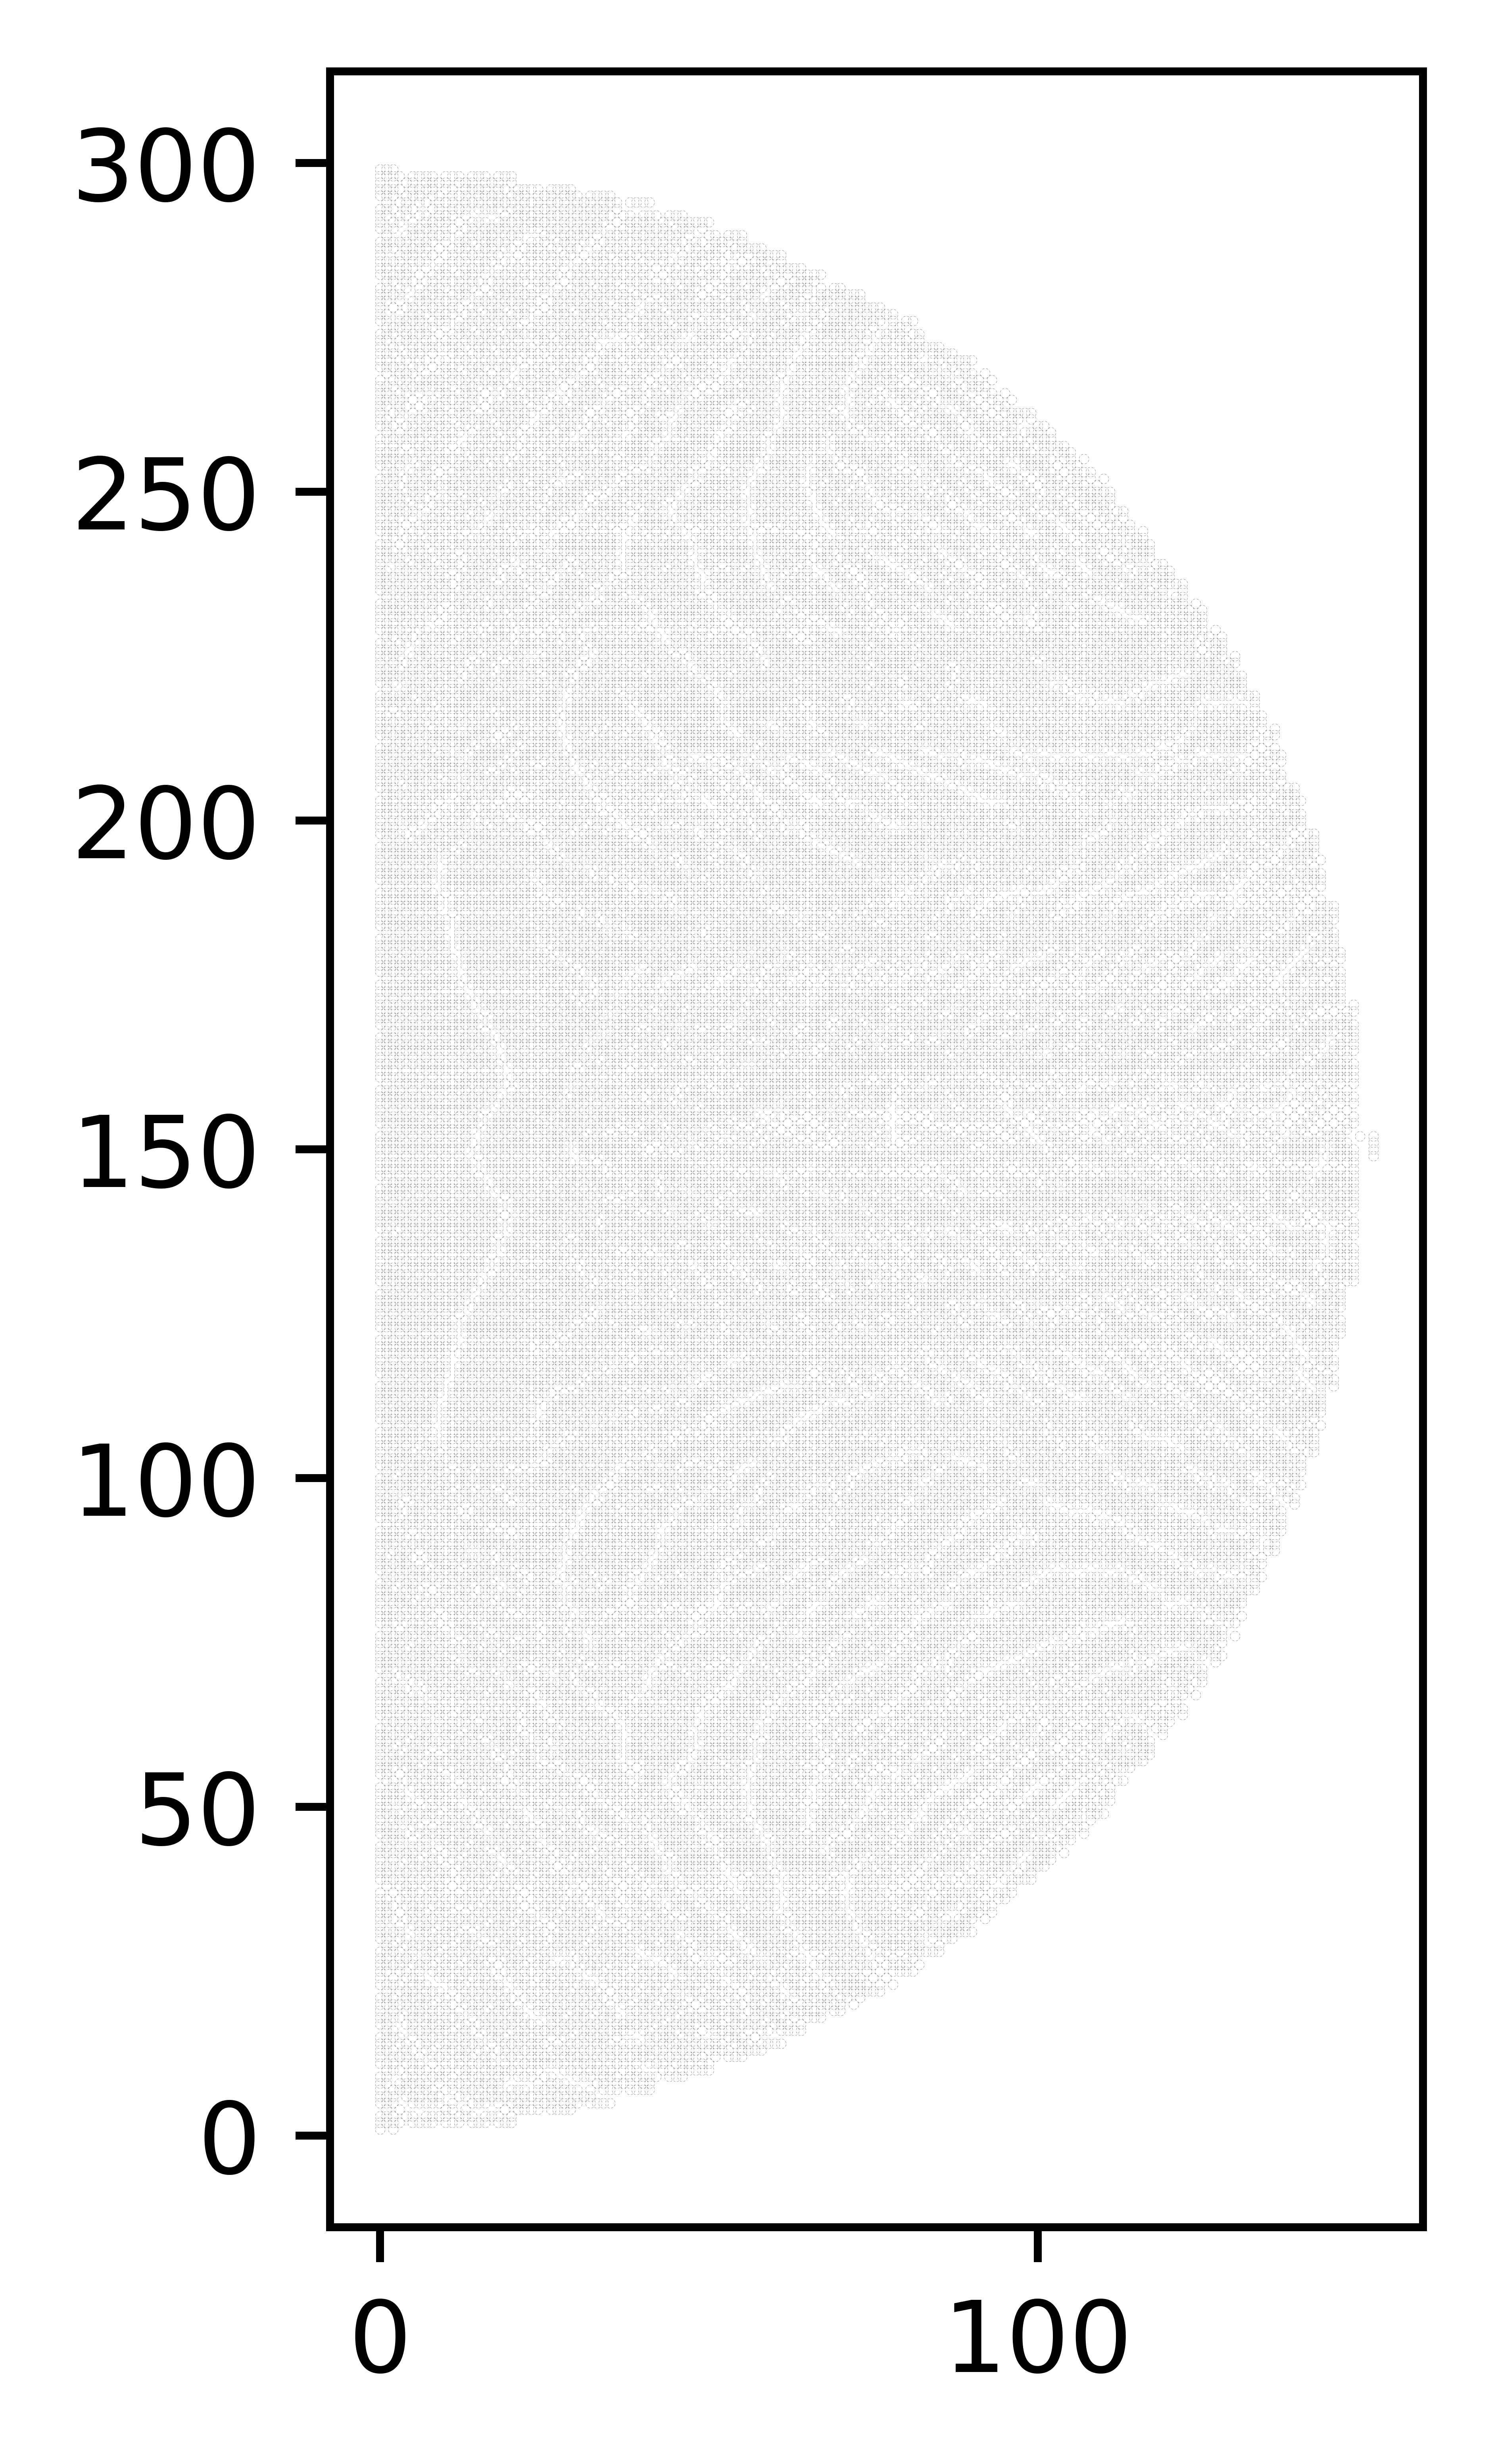

In [31]:
fig = plt.figure('vs_IdPos', dpi = 900)
ax = fig.add_subplot(111)
#ax.plot(LGN_surfaceL.pos[0,surfaceFilled], LGN_surfaceL.pos[1,surfaceFilled], ',k')
#ax.plot(surfaceId[0,np.logical_not(surfaceFilled)], surfaceId[1,np.logical_not(surfaceFilled)], ',r')
ax.plot(surfaceId[0,:], surfaceId[1,:], '.k', ms =0.01)
#ax.plot(LGN_surfaceL.pos[0,np.logical_not(surfaceFilled)], LGN_surfaceL.pos[1,np.logical_not(surfaceFilled)], ',r')
ax.set_aspect('equal')